In [43]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join( os.getcwd(), '..')))

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.utils import from_networkx
import numpy as np
from matplotlib import cm
import torch.nn as nn
from regular_tiling import gen_pyg_from_nx, plot_graph, plot_degree_histogram

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


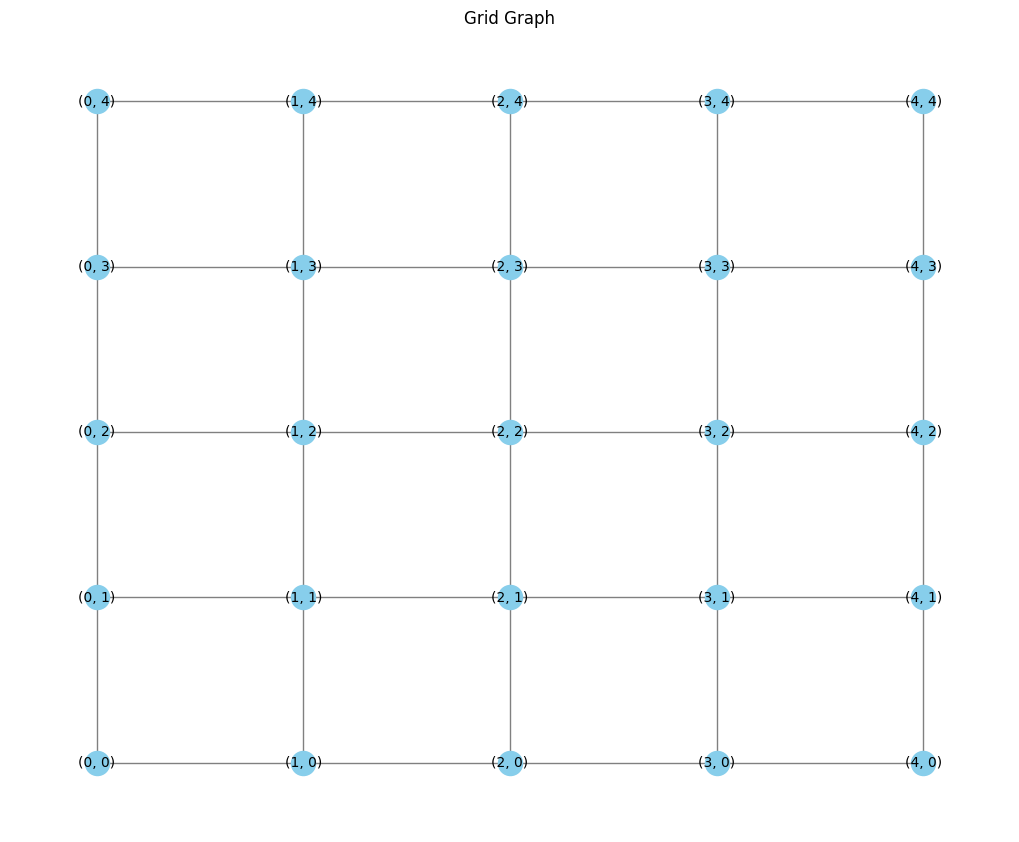

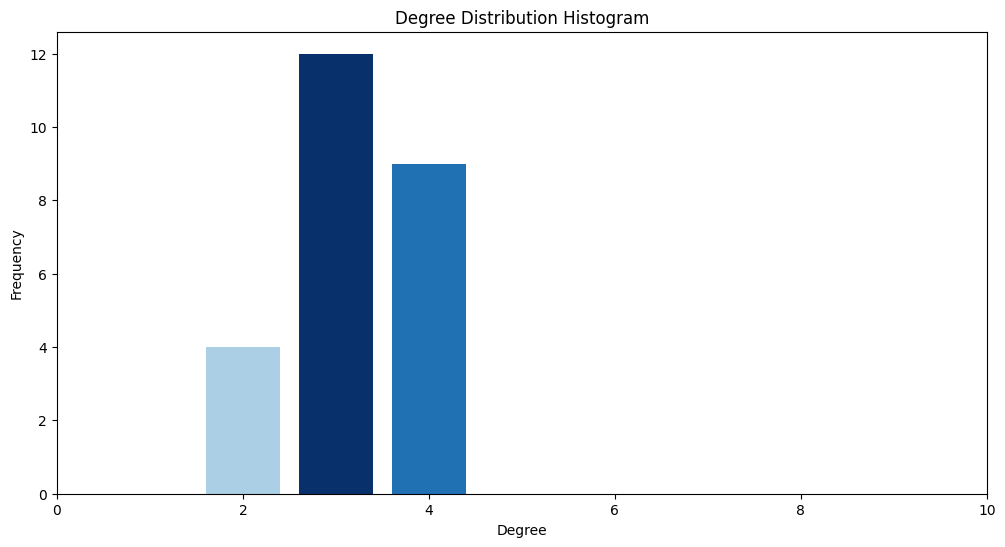

tensor([[ 1.2664e+00, -9.0613e-01,  1.0573e+00,  1.3593e+00, -1.2828e+00,
         -1.1533e+00,  2.4882e-01, -4.1917e-01, -2.1125e-02,  6.7668e-01,
          1.2757e-01, -5.0109e-01,  1.2139e+00,  8.3173e-03,  1.6383e-01,
          2.3361e-01, -2.9289e+00,  6.9918e-01,  1.2735e+00, -7.6490e-01,
         -5.0925e-01,  3.9424e-01,  4.1625e-01, -1.1922e+00,  1.0094e+00,
          9.1918e-01, -9.0025e-01, -1.3243e+00, -2.2610e-01, -2.7544e-01,
         -1.6932e+00, -8.9290e-01],
        [-2.4783e-01,  1.3642e+00, -6.7383e-01,  1.0932e+00,  2.6357e+00,
          7.2128e-01,  1.5274e-01, -4.9053e-01, -1.2650e-01,  5.2067e-01,
          1.5171e+00, -2.0389e-01,  1.0458e+00,  2.8206e+00,  1.4804e+00,
          8.8010e-01,  4.5167e-02,  8.8250e-01, -4.2921e-01, -1.1890e+00,
         -4.1749e-02, -4.0470e-02,  1.9195e+00,  2.4786e+00, -2.6369e-01,
          4.2413e-02, -1.2798e-01,  2.8605e-01, -4.1193e-01,  8.0203e-01,
          1.2220e+00, -2.7571e+00],
        [-7.4647e-01, -1.2733e+00, -1.57

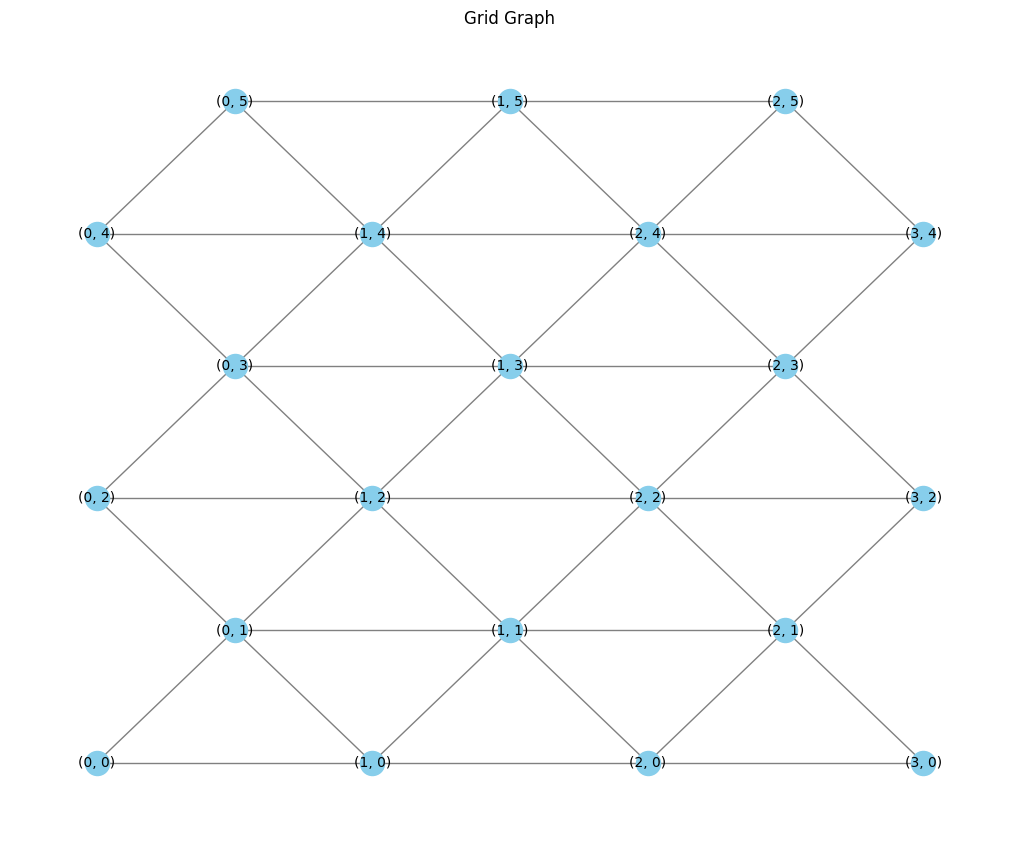

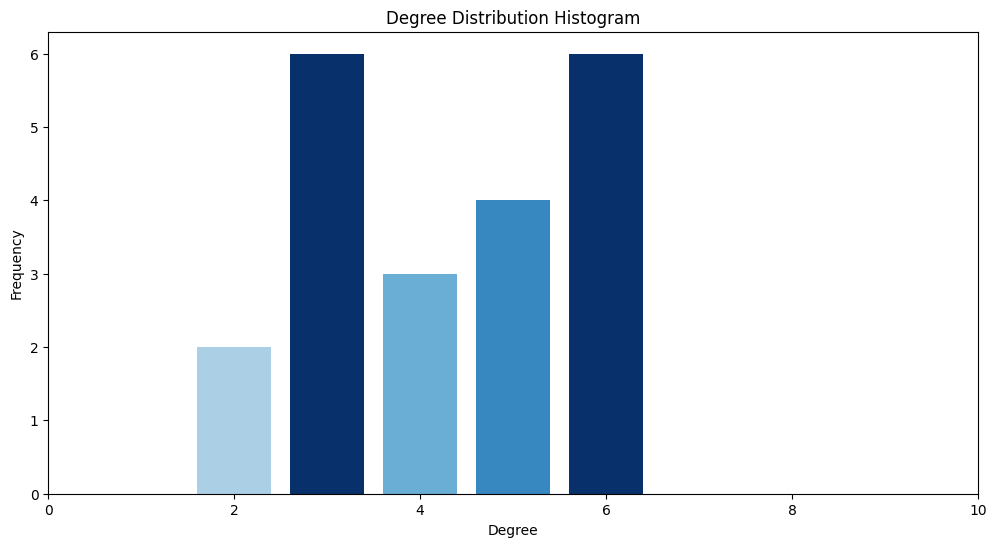

tensor([[ 0.8225,  0.6186, -0.2417,  1.8671,  1.0502, -0.5409,  0.0064,  0.5855,
         -1.0790,  0.1193,  0.3475, -0.0821,  0.3975,  0.4611, -1.7750,  0.5810,
          0.6384,  0.1974,  0.5525, -0.4241,  1.7742, -1.0862,  0.8740,  0.6150,
         -0.0210,  1.1542, -0.5449,  0.8823, -0.6610,  1.7892,  0.1249, -1.9601],
        [-1.0405,  0.6147, -0.8969,  0.6213,  0.0979, -0.3943,  0.9239,  0.9017,
         -0.8967,  0.1464, -0.9369,  0.5940, -1.1747,  0.4293,  0.0614,  0.4357,
         -0.8452,  0.8072,  0.6829, -1.4360,  0.4287, -0.3548, -2.1276,  0.1557,
          0.6530, -3.3907,  0.3352, -1.3854, -0.1628,  0.6099, -0.6993, -1.8697],
        [ 0.2835, -1.3876,  0.2179,  0.0784, -0.3145, -0.5878,  1.7386, -0.2051,
          0.4713, -2.3669, -1.1618,  0.8413, -0.4535,  1.3105,  0.9342,  1.2315,
          1.0352,  0.3771,  1.5454,  0.0059,  0.3353,  0.7972, -0.0135,  0.3870,
         -0.4337,  1.3157,  0.3316, -0.8026, -1.3285,  0.0970, -1.4131,  0.4335],
        [ 2.3877, -0.1503

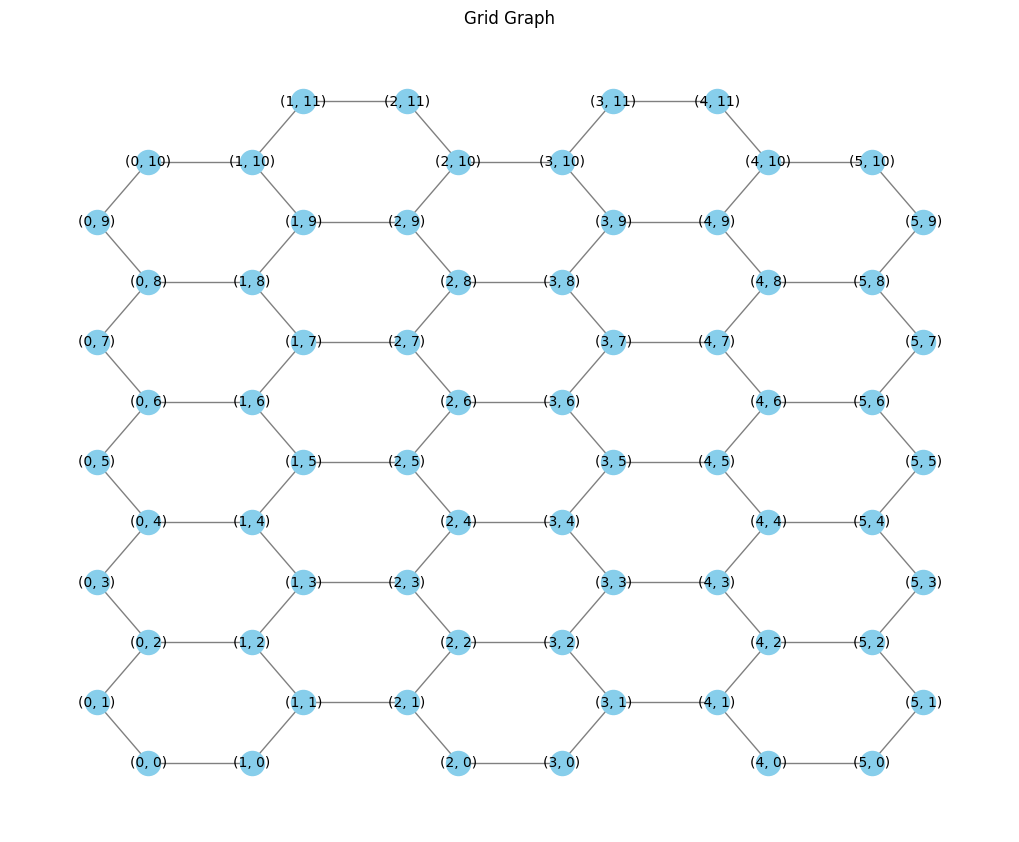

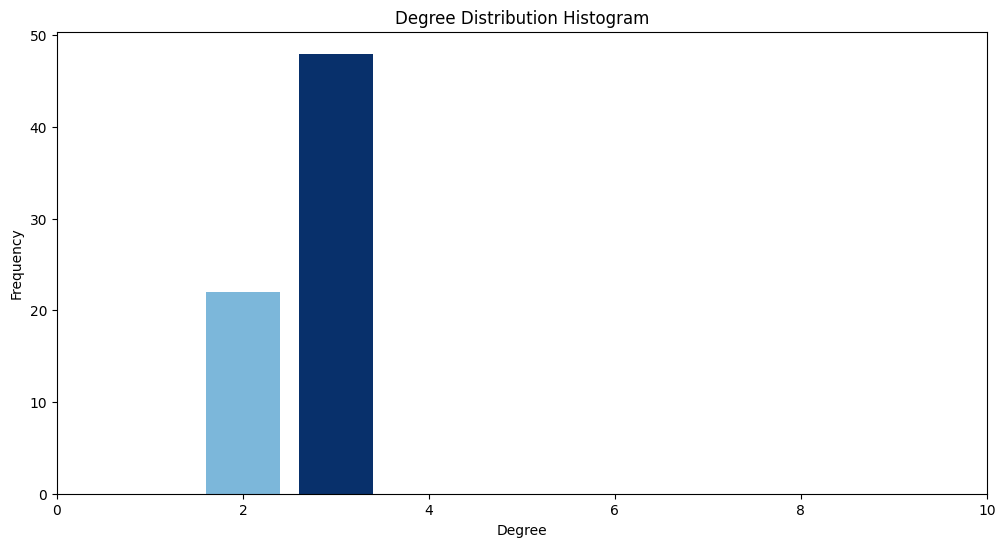

tensor([[ 0.2928,  0.5503, -0.3995,  ..., -0.9327,  0.7795, -0.0541],
        [ 0.9232, -0.6763, -0.1720,  ..., -0.2862,  1.0037,  0.4166],
        [ 0.2255, -0.3201,  0.6634,  ...,  0.8628, -0.7630,  0.8540],
        ...,
        [ 0.7417,  0.3416, -0.0940,  ..., -1.7503,  1.9453,  0.8919],
        [ 0.6423, -0.2136,  0.4463,  ...,  0.2949,  1.4853, -1.3562],
        [-1.0405, -0.5336,  1.7017,  ..., -0.4491, -0.8563,  0.4104]])
tensor([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  7,
          7,  8,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14,
         14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20,
         20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33,
         33, 33, 34, 34, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39,
         40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45,

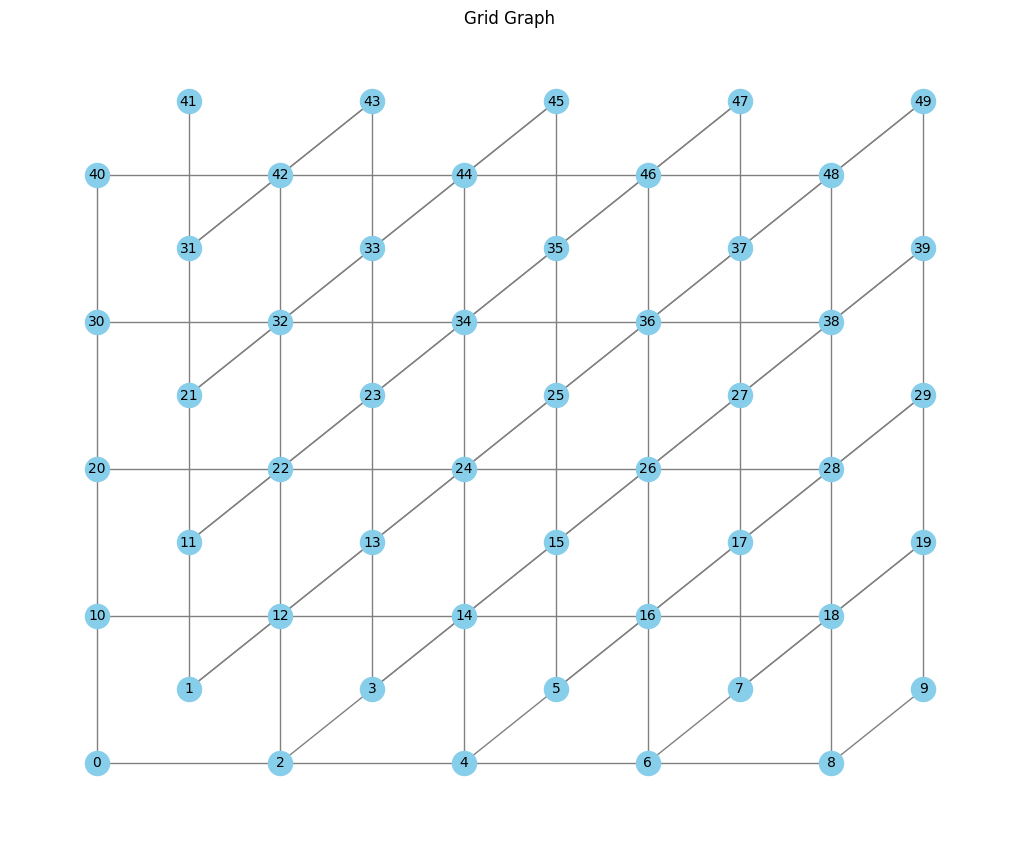

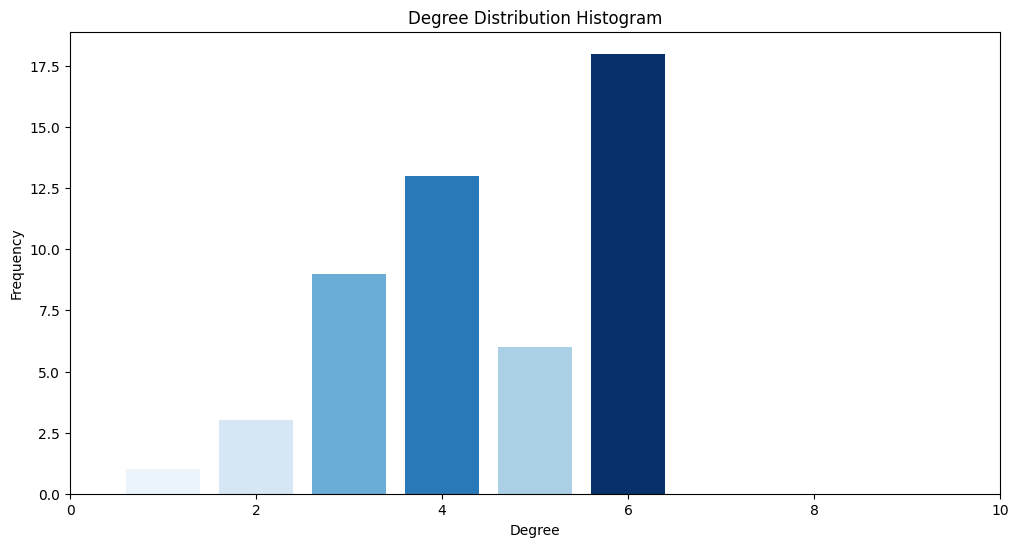

tensor([[ 1.0173, -0.1717, -2.2448,  ...,  0.5382, -0.5245,  0.9146],
        [ 0.0187, -0.0622, -1.8240,  ..., -0.7467,  0.0273, -1.7398],
        [ 0.4942, -0.7098,  0.1334,  ..., -0.4952,  0.0355,  0.6130],
        ...,
        [-1.5880, -0.2909, -2.8624,  ..., -0.5936,  1.8296, -0.6408],
        [ 0.3588, -0.4029,  0.4499,  ..., -0.4322,  0.3876, -0.2617],
        [-0.3843,  0.3535,  0.6581,  ...,  0.7775,  0.2427, -0.1533]])
tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
          9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15,
         16, 16, 16, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 21,
         21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24,
         24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27,

In [45]:

# Create a grid graph
m, n = 10, 10

for graph_type in ['grid', 'triangle', 'hexagonal', 'kagome']:
    data, G, pos = gen_pyg_from_nx(m, n, 32, graph_type)
    
    plt = plot_graph(G, pos, title="Grid Graph")
    plt.show()
    # plt.savefig('grid_graph.png')
    plt.close()
    plt = plot_degree_histogram(G)
    plt.show()
    # plt.savefig('grid_graph_degree_hist.png')
    plt.close()


    print(data.x)
    print(data.edge_index)